**Data Input**

In [ ]:
import csv
import numpy as np
np.set_printoptions(suppress=True)

with open('agaricus-lepiota.data', newline='') as csv_file:
    mushroom = list(csv.reader(csv_file, delimiter=','))
    mushroom = np.asarray(mushroom)

with open('iris.data', newline='') as csv_file:
    iris = list(csv.reader(csv_file, delimiter=','))
    # remove the last empty line in the file
    iris.pop()
    iris = np.asarray(iris)

**mushroom - value frequency**

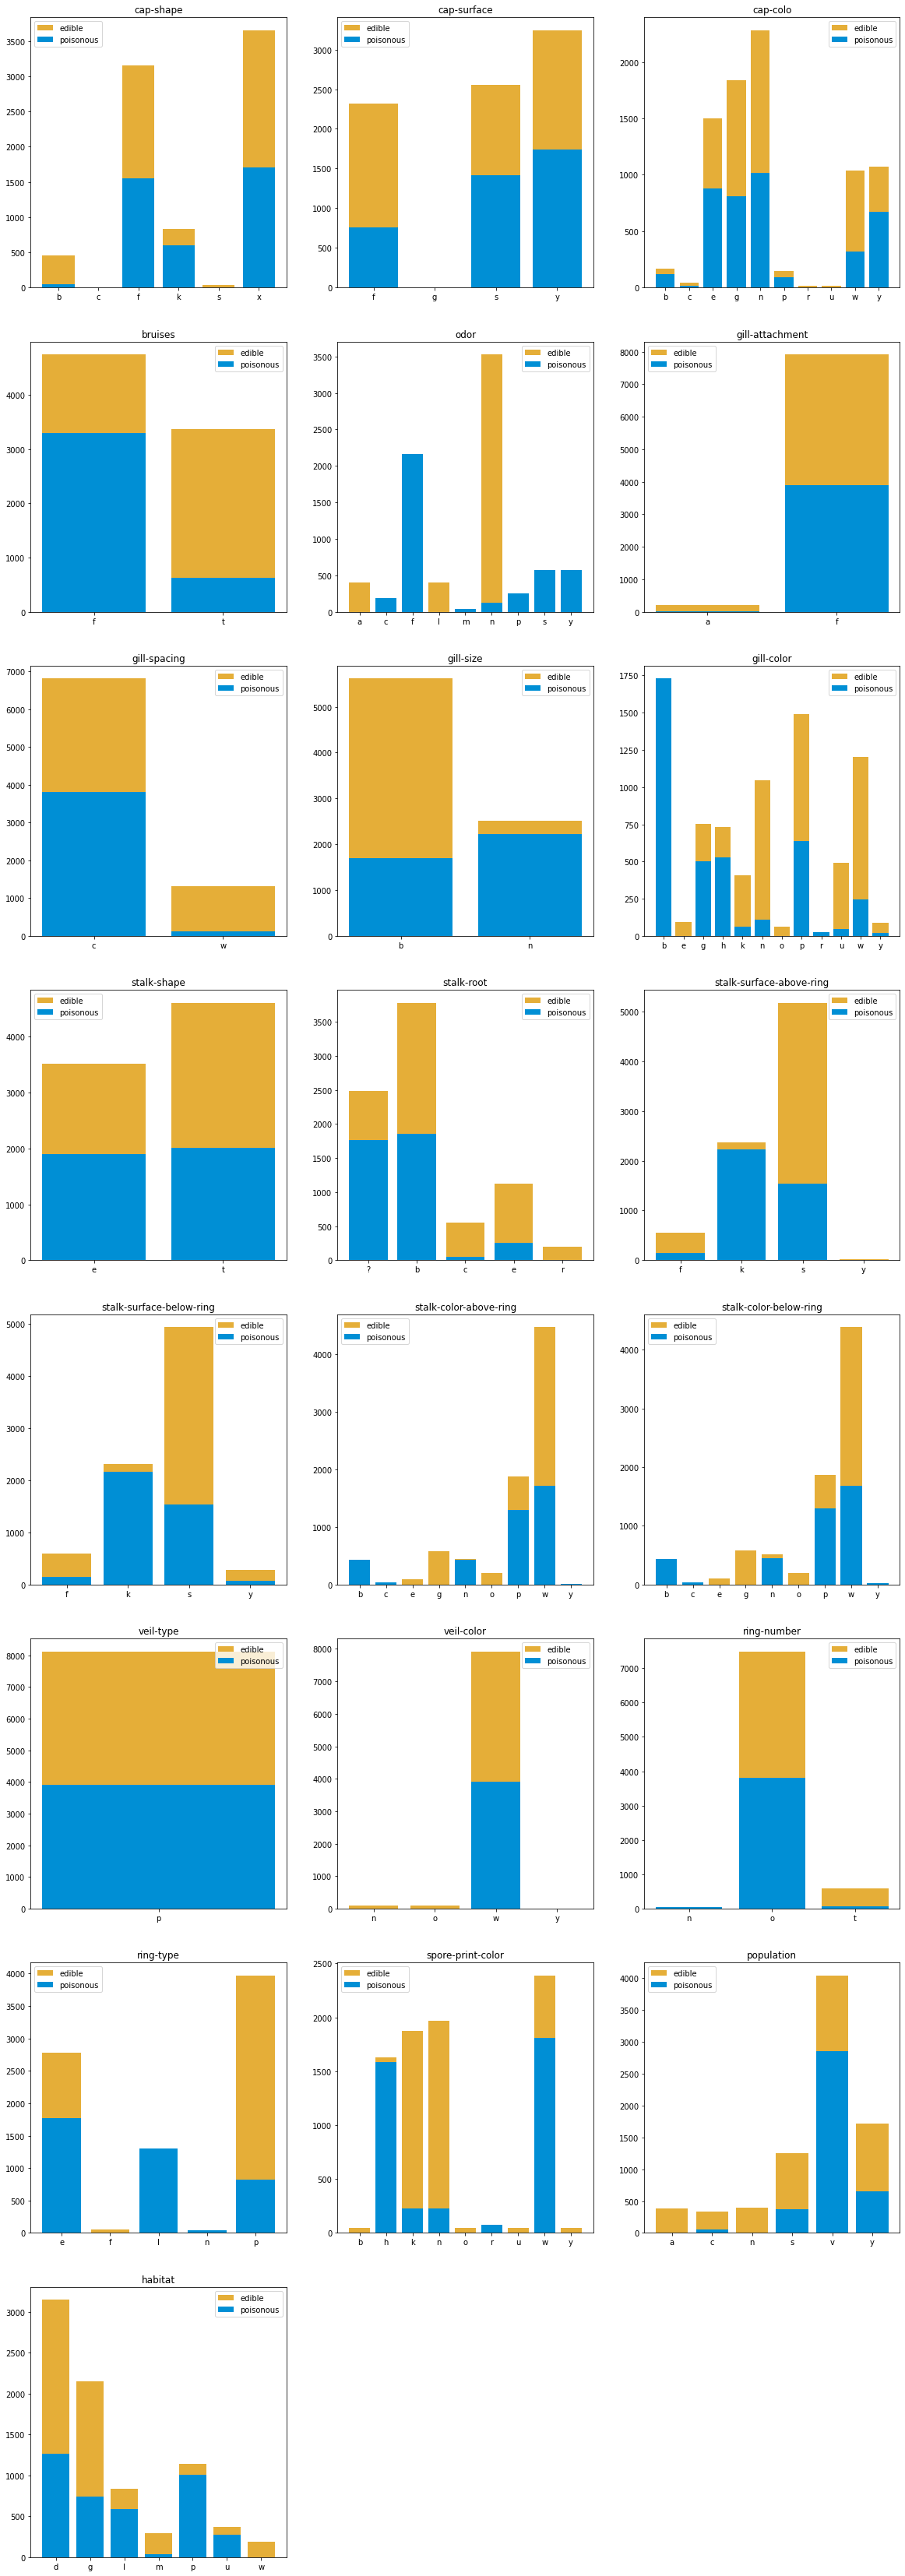

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,60))

m_feature = ["cap-shape",
"cap-surface",
"cap-colo",
"bruises",
"odor",
"gill-attachment",
"gill-spacing",
"gill-size",
"gill-color",
"stalk-shape",
"stalk-root",
"stalk-surface-above-ring",
"stalk-surface-below-ring",
"stalk-color-above-ring",
"stalk-color-below-ring",
"veil-type",
"veil-color",
"ring-number",
"ring-type",
"spore-print-color",
"population",
"habitat"]

for i in range(22):
  plt.subplot(8, 3, i+1)
  plt.title(m_feature[i])
  # (poisonous + edible) - poisonous = edible
  (x, y) = np.unique(mushroom[:, i+1], return_counts=True)
  plt.bar(x, y, color="#e5ae38", label='edible')
  p_mushroom = mushroom[np.where(mushroom[:, 0]=='p')]
  (p_x, p_y) = np.unique(p_mushroom[:, i+1], return_counts=True)
  plt.bar(p_x, p_y, color="#008fd5", label='poisonous')
  plt.legend()

plt.show()

**Iris**   

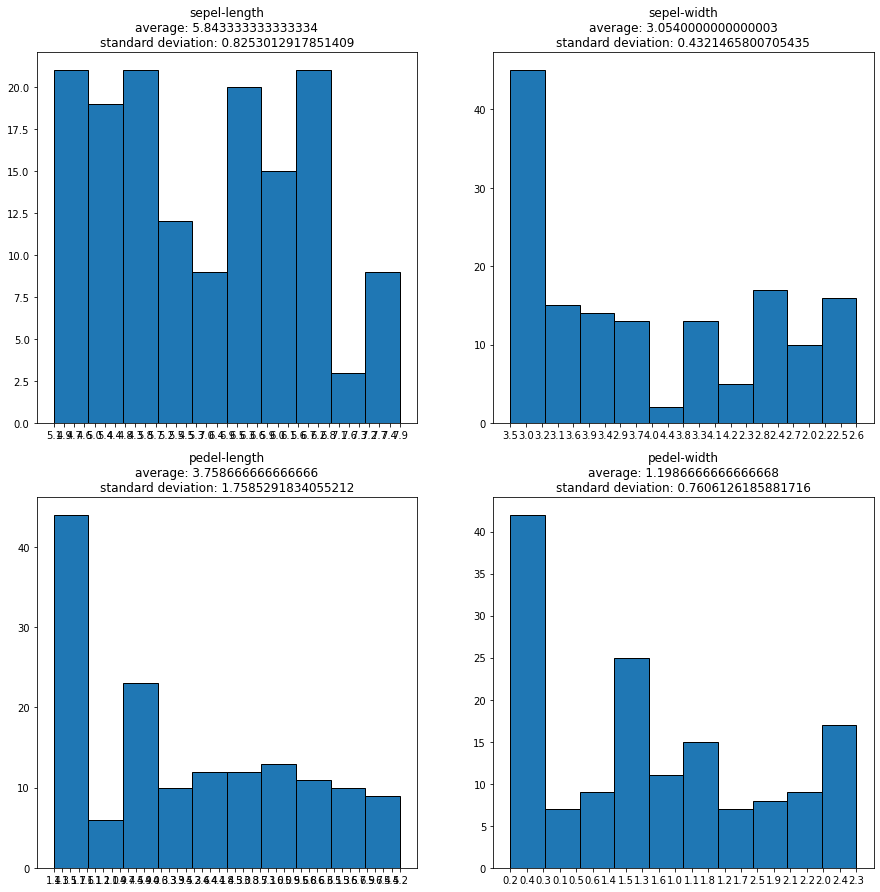

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

i_features = ["sepel-length", "sepel-width", "pedel-length", "pedel-width"]

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.title(i_features[i] + '\n' + "average: "+ str(np.average(iris[:, i].astype(float))) + '\n' + "standard deviation: " + str(np.std(iris[:, i].astype(float))))
  plt.hist(iris[:,i], edgecolor='black')

plt.show()

**Iris-setosa**

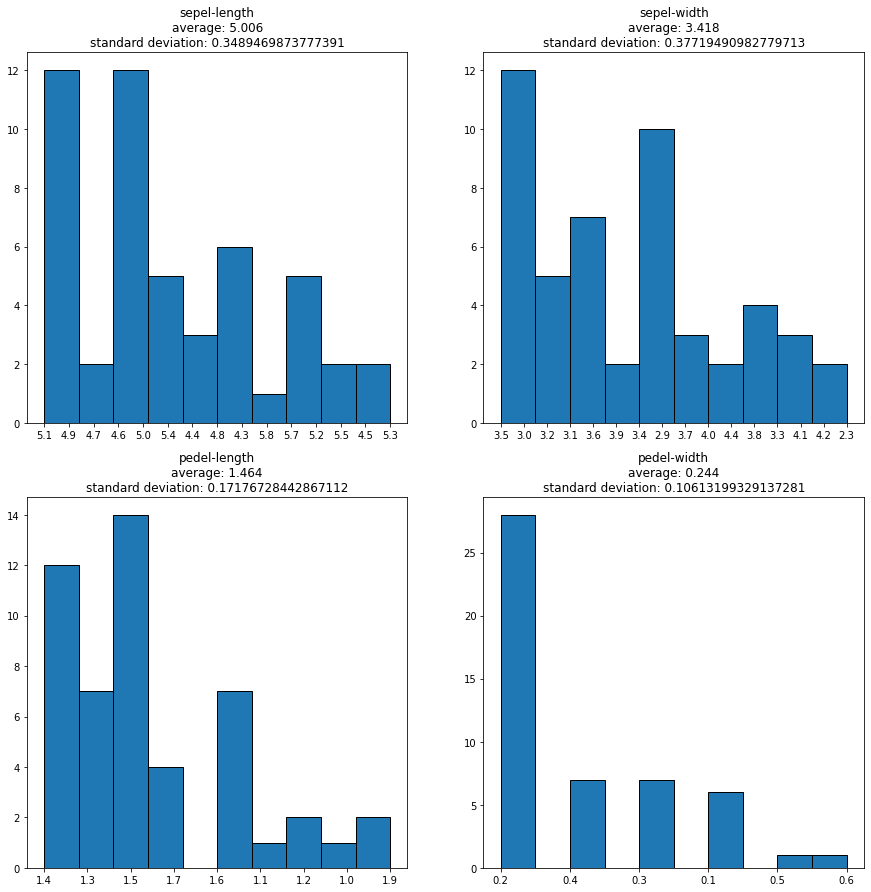

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

setosa = iris[np.where(iris[:,4]=='Iris-setosa')]

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.title(i_features[i] + '\n' + "average: " + str(np.average(setosa[:, i].astype(float))) + '\n' + "standard deviation: " + str(np.std(setosa[:, i].astype(float))))
  plt.hist(setosa[:,i], edgecolor='black')

plt.show()

**Iris-versicolor**

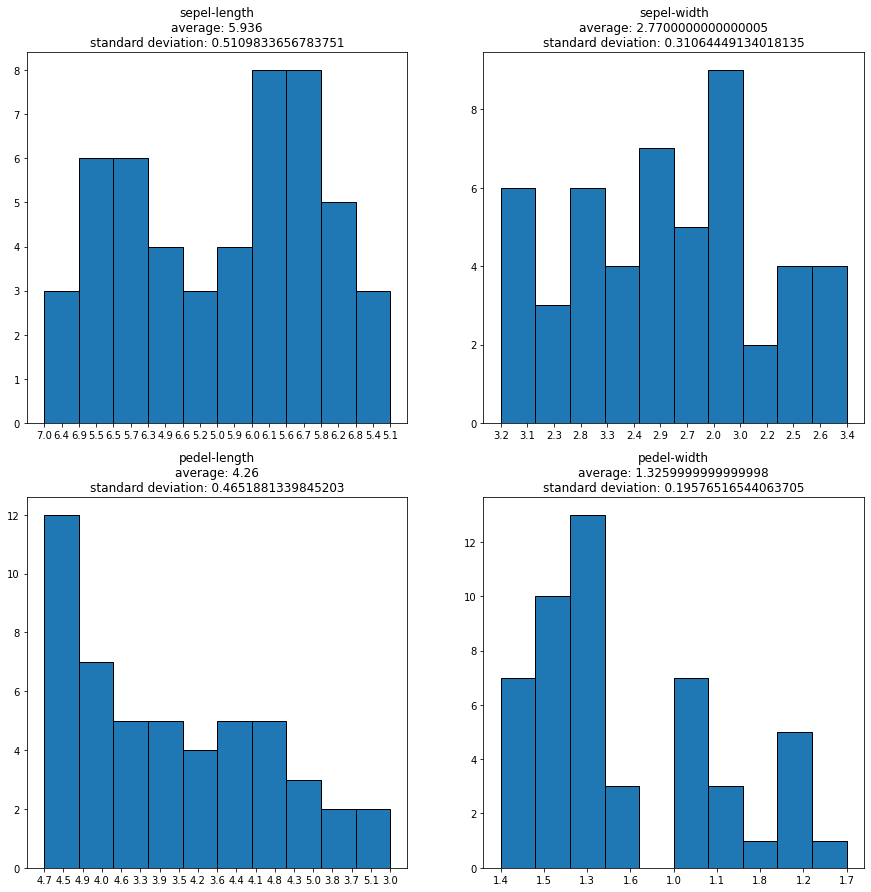

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

versicolor = iris[np.where(iris[:,4]=='Iris-versicolor')]

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.title(i_features[i] + '\n' + "average: " + str(np.average(versicolor[:, i].astype(float))) + '\n' + "standard deviation: " + str(np.std(versicolor[:, i].astype(float))))
  plt.hist(versicolor[:,i], edgecolor='black')

plt.show()

**Iris-virginica**

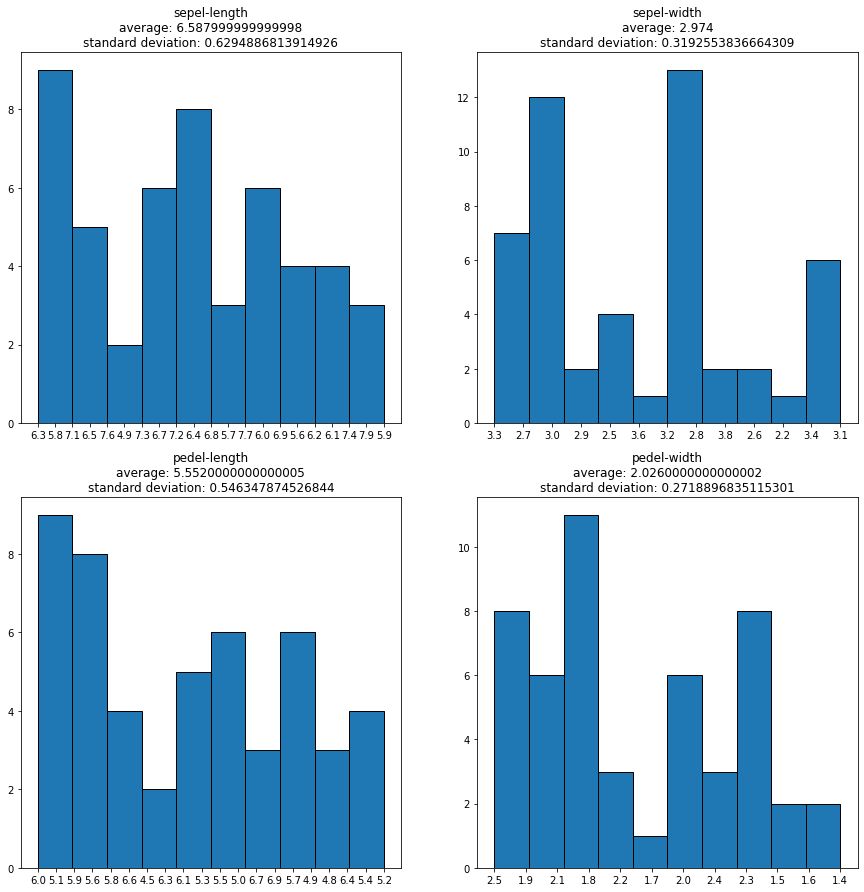

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

virginica = iris[np.where(iris[:,4]=='Iris-virginica')]

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.title(i_features[i] + '\n' + "average: " + str(np.average(virginica[:, i].astype(float))) + '\n' + "standard deviation: " + str(np.std(virginica[:, i].astype(float))))
  plt.hist(virginica[:,i], edgecolor='black')

plt.show()

**Question - Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts**

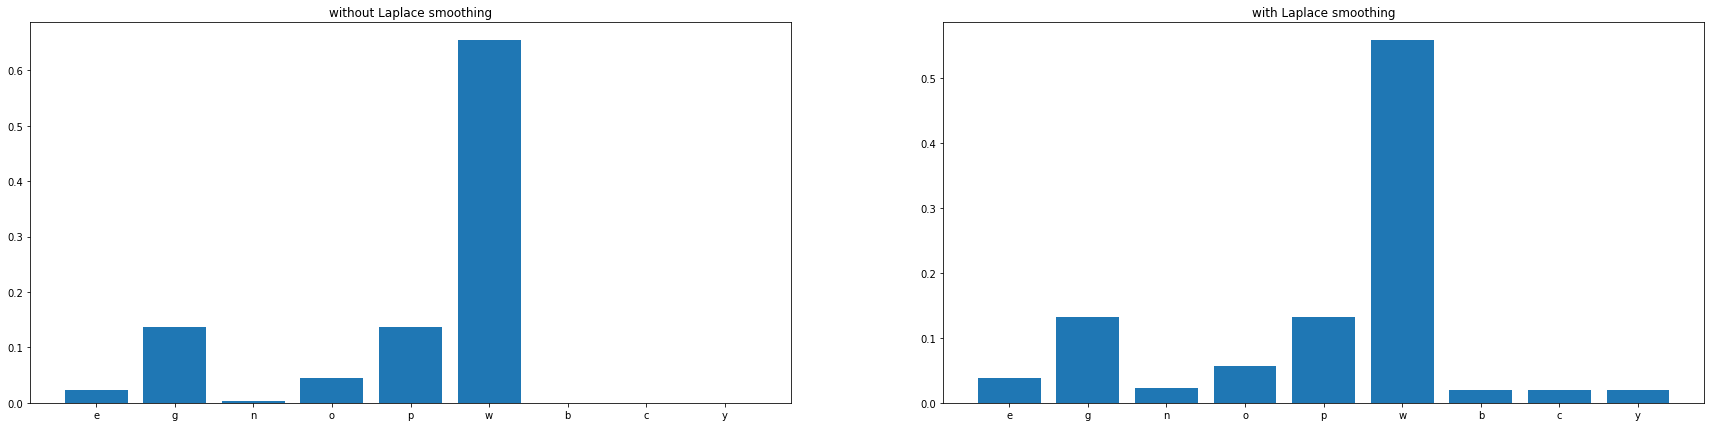

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,7))

e_mushroom = mushroom[np.where(mushroom[:,0]=='e')]
(x, y) = np.unique(e_mushroom[:,14], return_counts=True)
x = np.concatenate((x, ['b', 'c', 'y']))
y = np.concatenate((y, [0, 0, 0]))

plt.subplot(1,2,1)
plt.title('without Laplace smoothing')
plt.bar(x, y/np.sum(y))
plt.subplot(1,2,2)
plt.title('with Laplace smoothing')
plt.bar(x, (y+100)/(np.sum(y)+9*100))
plt.show()

**Question - What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)?**

In [ ]:
mu = np.average(versicolor[:,2].astype(float))
sigma = np.std(versicolor[:,2].astype(float))
print("μ: " + str(mu))
print("σ: " + str(sigma))

μ: 4.26
σ: 0.4651881339845203


**Question - Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)**

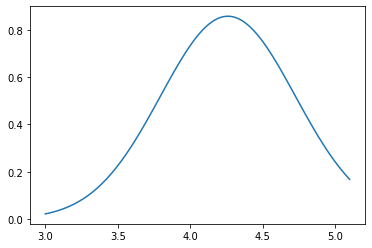

In [ ]:
x = np.linspace(versicolor[:,2].astype(float).min(), versicolor[:,2].astype(float).max(), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

plt.plot(x,y)
plt.show()

**Drop features with any missing value**

In [ ]:
mushroom = np.delete(mushroom, np.where(mushroom[:,:]=='?')[1], axis=1)

**Shuffle the data**

In [ ]:
np.random.shuffle(mushroom)
np.random.shuffle(iris)

**Transform data format and shape - mushroom**<br>
Encode categorical features as an integer array

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

m_y = mushroom[:,0]
m_x = OrdinalEncoder().fit_transform(mushroom[:,1:])

**Model Construction - mushroom**<br>
m_cls - without Laplace smoothing<br>
m_cls_laplace - with Laplace smoothing

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore") 

m_cls = CategoricalNB(alpha = 0)
m_cls_laplace = CategoricalNB()

**Holdout validation**

In [ ]:
from sklearn.model_selection import train_test_split

m_x_train, m_x_test, m_y_train, m_y_test = train_test_split(m_x, m_y, test_size=0.3)

without Laplace smoothing

In [ ]:
m_cls.fit(m_x_train, m_y_train)
m_y_pred = m_cls.predict(m_x_test)

print(confusion_matrix(m_y_test, m_y_pred, labels=['e', 'p']))
print('Accuracy: ' + str(accuracy_score(m_y_test, m_y_pred)))
print('Sensitivity(Recall): ' + str(recall_score(m_y_test, m_y_pred, pos_label='e')))
print('Precision: ' + str(precision_score(m_y_test, m_y_pred, pos_label='e')))

[[1278    2]
 [   0 1158]]
Accuracy: 0.9991796554552912
Sensitivity(Recall): 0.9984375
Precision: 1.0


with Laplace smoothing

In [ ]:
m_cls_laplace.fit(m_x_train, m_y_train)
m_y_pred = m_cls_laplace.predict(m_x_test)

print(confusion_matrix(m_y_test, m_y_pred, labels=['e', 'p']))
print('Accuracy: ' + str(accuracy_score(m_y_test, m_y_pred)))
print('Sensitivity(Recall): ' + str(recall_score(m_y_test, m_y_pred, pos_label='e')))
print('Precision: ' + str(precision_score(m_y_test, m_y_pred, pos_label='e')))

[[1278    2]
 [  96 1062]]
Accuracy: 0.9598031173092699
Sensitivity(Recall): 0.9984375
Precision: 0.9301310043668122


**K-fold cross-validation**<br>
without Laplace smoothing

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

m_y_test = []
m_y_pred = []

for train_index, test_index in kf.split(m_x):
  x_train, x_test= m_x[train_index], m_x[test_index]
  y_train, y_test= m_y[train_index], m_y[test_index]

  m_cls.fit(x_train, y_train)
  y_pred = m_cls.predict(x_test)
  m_y_test.extend(y_test)
  m_y_pred.extend(y_pred)

print(confusion_matrix(m_y_test, m_y_pred, labels=['e', 'p'])/3)
print('Accuracy: ' + str(accuracy_score(m_y_test, m_y_pred)))
print('Sensitivity(Recall): ' + str(recall_score(m_y_test, m_y_pred, pos_label='e')))
print('Precision: ' + str(precision_score(m_y_test, m_y_pred, pos_label='e')))


[[1396.            6.66666667]
 [   1.         1304.33333333]]
Accuracy: 0.9971688823239784
Sensitivity(Recall): 0.9952471482889734
Precision: 0.9992841803865425


**K-fold cross-validation**<br>
with Laplace smoothing

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

m_y_test = []
m_y_pred = []

for train_index, test_index in kf.split(m_x):
  x_train, x_test= m_x[train_index], m_x[test_index]
  y_train, y_test= m_y[train_index], m_y[test_index]

  m_cls_laplace.fit(x_train, y_train)
  y_pred = m_cls_laplace.predict(x_test)
  m_y_test.extend(y_test)
  m_y_pred.extend(y_pred)

print(confusion_matrix(m_y_test, m_y_pred, labels=['e', 'p'])/3)
print('Accuracy: ' + str(accuracy_score(m_y_test, m_y_pred)))
print('Sensitivity(Recall): ' + str(recall_score(m_y_test, m_y_pred, pos_label='e')))
print('Precision: ' + str(precision_score(m_y_test, m_y_pred, pos_label='e')))

[[1395.66666667    7.        ]
 [ 107.66666667 1197.66666667]]
Accuracy: 0.9576563269325455
Sensitivity(Recall): 0.9950095057034221
Precision: 0.9283813747228381


**Transform data format and shape - Iris**<br>
**Bonus: any other transformation boosts the final performance.**<br>
transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

i_y = iris[:,-1]
i_x = StandardScaler().fit_transform(iris[:,:-1].astype(float))

**Model Construction - Iris**<br>
i_cls - 1D-Normal(Gaussian) distribution

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

i_cls = GaussianNB()

**Holdout validation**

In [ ]:
from sklearn.model_selection import train_test_split

i_x_train, i_x_test, i_y_train, i_y_test = train_test_split(i_x, i_y, test_size=0.3)

i_cls.fit(i_x_train, i_y_train)
i_y_pred = i_cls.predict(i_x_test)

print(confusion_matrix(i_y_test, i_y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
print('Accuracy: ' + str(accuracy_score(i_y_test, i_y_pred)))
print(classification_report(i_y_test, i_y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))

[[18  0  0]
 [ 0 12  2]
 [ 0  1 12]]
Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



**K-fold cross-validation**

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

i_y_test = []
i_y_pred = []

for train_index, test_index in kf.split(i_x):
  x_train, x_test= i_x[train_index], i_x[test_index]
  y_train, y_test= i_y[train_index], i_y[test_index]

  i_cls.fit(x_train, y_train)
  y_pred = i_cls.predict(x_test)
  i_y_test.extend(y_test)
  i_y_pred.extend(y_pred)

print(confusion_matrix(i_y_test, i_y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])/3)
print('Accuracy: ' + str(accuracy_score(i_y_test, i_y_pred)))
print(classification_report(i_y_test, i_y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))

[[16.66666667  0.          0.        ]
 [ 0.         15.66666667  1.        ]
 [ 0.          1.         15.66666667]]
Accuracy: 0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



**Results**

| Mushroom            | Holdout | Holdout<br/> Laplace | Kfold  | Kfold<br/>Laplace |
|---------------------|:---------:|:-----------------:|:--------:|:--------------:|
| Accuracy            | 0.9991  | 0.9598          | 0.9971 | 0.9576        |
| Sensitivity(Recall) | 0.9984  | 0.9984          | 0.9952 | 0.9950        |
| Precision           | 1.0     | 0.9301          | 0.9992 | 0.9283        |


| Iris               | Sensitivity(Recall) | Precision | Accuracy |
|--------------------|--:-:----------------|--:-:------|--:-:-----|
| Holdout setosa     | 1.0                 | 1.0       | 0.93     |
| Holdout versicolor | 0.86                | 0.92      | 0.93     |
| Holdout virginica  | 0.92                | 0.86      | 0.93     |
| Kfold setosa       | 1.0                 | 1.0       | 0.96     |
| Kfold versicolor   | 0.94                | 0.94      | 0.96     |
| Kfold virginica    | 0.94                | 0.94      | 0.96     |
